#Theory

1.  What is Logistic Regression, and how does it differ from Linear Regression?
- **Logistic Regression** and **Linear Regression** are both fundamental algorithms in statistical modeling and machine learning, but they serve different purposes and make different assumptions. Here’s a breakdown of each and their key distinctions:

---

## 1. Problem Type

* **Linear Regression**

  * **Task**: Predict a *continuous* outcome (e.g., house price, temperature).
  * **Example**: Estimating a student’s exam score based on hours studied.

* **Logistic Regression**

  * **Task**: Predict a *categorical* outcome, typically binary (e.g., spam vs. not spam).
  * **Example**: Classifying emails as “spam” (1) or “not spam” (0).

---

## 2. Model Formulation

1. **Linear Regression**

   * **Model**:

     $$
     \hat y = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
     $$
   * **Interpretation**: The prediction $\hat y$ is a weighted sum of the input features.

2. **Logistic Regression**

   * **Model**:

     $$
     z = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
     \quad,\quad
     \hat p = \sigma(z) = \frac{1}{1 + e^{-z}}
     $$
   * **Interpretation**:

     * First compute the linear combination $z$.
     * Then apply the **sigmoid (logistic) function** $\sigma(z)$ to squash $z$ into the range $(0,1)$.
     * $\hat p$ is interpreted as the probability of the “positive” class (e.g., class = 1).

---

## 3. Loss (Cost) Functions

* **Linear Regression**

  * **Mean Squared Error (MSE)**:

    $$
    J(\beta) = \frac{1}{n}\sum_{i=1}^n (y_i - \hat y_i)^2
    $$
  * **Optimization**: Often solved in closed form (normal equations) or via gradient descent.

* **Logistic Regression**

  * **Log-Loss** (aka **Binary Cross-Entropy**):

    $$
    J(\beta) = -\frac{1}{n}\sum_{i=1}^n\Bigl[y_i\log(\hat p_i) + (1-y_i)\log(1-\hat p_i)\Bigr]
    $$
  * **Optimization**: No closed-form; typically uses iterative methods like gradient descent or Newton’s method.

---

## 4. Output & Interpretation

| Aspect             | Linear Regression        | Logistic Regression                                   |
| ------------------ | ------------------------ | ----------------------------------------------------- |
| **Output**         | Real number $\hat y$     | Probability $\hat p\in(0,1)$                          |
| **Decision Rule**  | —                        | $\hat y = 1$ if $\hat p \ge 0.5$ (threshold can vary) |
| **Interpretation** | Direct prediction of $y$ | Odds ratio: $\log\frac{p}{1-p}$ is linear in $x$      |

---

## 5. Assumptions & Considerations

1. **Linearity**

   * Both assume a linear relationship in the *log-odds* (for logistic) or in the *outcome* (for linear).
2. **Residuals**

   * Linear regression residuals are assumed to be normally distributed with constant variance (homoscedasticity).
   * Logistic regression does not assume normal residuals—its probabilistic model handles variance inherently.
3. **Outliers & Leverage**

   * Outliers can heavily influence linear regression; logistic regression is generally more robust in classification contexts but can still be affected by extreme feature values.

---

## 6. Use Cases & Extensions

* **Linear Regression**

  * Predicting prices, forecasting sales, modeling physical phenomena.
  * Extensions: *Ridge*, *Lasso*, *Polynomial Regression*, *Generalized Additive Models*.

* **Logistic Regression**

  * Medical diagnosis (disease vs. healthy), credit scoring (default vs. no default), email spam detection.
  * Extensions: *Multinomial Logistic Regression* (for >2 classes), *Regularized Logistic Regression* (L1/L2 penalties).

---

### Summary

| Feature          | Linear Regression       | Logistic Regression                          |
| ---------------- | ----------------------- | -------------------------------------------- |
| **Goal**         | Estimate continuous $y$ | Estimate probability of class membership     |
| **Model Output** | $\hat y\in\mathbb{R}$   | $\hat p\in(0,1)$ via sigmoid of linear model |
| **Loss**         | Mean Squared Error      | Log-Loss (Cross-Entropy)                     |
| **Decision**     | —                       | Threshold probability to classify            |

In essence, **linear regression** is your go-to when the target is continuous, whereas **logistic regression** adapts that linear idea to the classification realm by wrapping it in a sigmoid function and optimizing a likelihood-based loss.


2.  What is the mathematical equation of Logistic Regression?
- The core of logistic regression can be written in two equivalent ways:

---

1. **Probability (sigmoid) form**

   $$
   \hat p = P(y = 1 \mid \mathbf{x}) \;=\; \sigma\!\bigl(z\bigr)
   \quad\text{where}\quad
   z = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p
   $$

   and the **sigmoid** (logistic) function is

   $$
   \sigma(z) = \frac{1}{1 + e^{-\,z}}.
   $$

   So explicitly:

   $$
   P(y=1 \mid \mathbf{x})
   = \frac{1}{1 + \exp\bigl[-(\beta_0 + \sum_{j=1}^p \beta_j x_j)\bigr]}.
   $$

2. **Log-odds (logit) form**
   Taking the log of the odds ratio gives a *linear* expression in the inputs:

   $$
   \log\!\Bigl(\frac{P(y=1 \mid \mathbf{x})}{P(y=0 \mid \mathbf{x})}\Bigr)
   = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p.
   $$

---

* **Interpretation**

  * $\beta_0$ is the intercept (baseline log-odds when all $x_j=0$).
  * Each $\beta_j$ is the change in the log-odds of $y=1$ per one-unit increase in $x_j$.

* **From logit to probability**

  $$
  P(y=1 \mid \mathbf{x})
  = \frac{e^{\beta_0 + \sum_j \beta_j x_j}}
         {1 + e^{\beta_0 + \sum_j \beta_j x_j}}.
  $$

That pair of equations—sigmoid for probability, logit for linearity—constitutes the mathematical heart of logistic regression.


3.  Why do we use the Sigmoid function in Logistic Regression?
- We use the **sigmoid (logistic) function** in logistic regression for several interrelated reasons:

1. **Squashes Into a Probability**

   * The raw linear combination

     $$
       z = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p
     $$

     can take any real value $(-\infty, +\infty)$.
   * The sigmoid

     $$
       \sigma(z) = \frac{1}{1 + e^{-z}}
     $$

     maps $z$ smoothly into the interval $(0,1)$, which we interpret as

     $$
       \hat p = P(y=1 \mid x) \in (0,1).
     $$

2. **Monotonic & Smooth**

   * $\sigma(z)$ is strictly increasing: larger $z$ → larger $\sigma(z)$.
   * It’s infinitely differentiable, which makes gradient-based optimization (like gradient descent or Newton’s method) straightforward.

3. **Link to Log-Odds (Linear Relationship)**

   * The inverse of the sigmoid is the **logit**:

     $$
       \operatorname{logit}(p) = \ln\frac{p}{1-p}\quad\Longrightarrow\quad z = \beta_0 + \sum_j\beta_j x_j.
     $$
   * This gives a direct linear relationship between the predictors and the log-odds of the outcome, which is intuitive and interpretable:
     $\beta_j$ is the change in log-odds per unit change in $x_j$.

4. **Convenient Derivative**

   * $\sigma'(z) = \sigma(z)\bigl[1 - \sigma(z)\bigr]$.
   * This simple form lets us write the gradient of the log-likelihood cleanly, speeding up convergence in training.

5. **Probabilistic Foundation**

   * Under the hood, logistic regression can be derived as a special case of a **generalized linear model** (GLM) with a binomial distribution and the logit link.
   * The sigmoid arises naturally when you maximize the binomial likelihood with that link function.

---

**In summary**, the sigmoid function is the perfect bridge between a linear predictor and a probability: it ensures outputs lie in $(0,1)$, preserves monotonicity for interpretability, has a mathematically tractable derivative, and aligns with the statistical foundations of binary classification.


4.  What is the cost function of Logistic Regression?
- The cost function (also called the loss function) that logistic regression minimizes is the **binary cross-entropy** (or **log-loss**). It measures how “surprised” the model is by the true labels given its predicted probabilities. Formally:

---

### 1. Per-example loss

For a single training example $(\mathbf{x}^{(i)}, y^{(i)})$, with model output

$$
\hat p^{(i)} = h_\beta(\mathbf{x}^{(i)})
= \sigma\bigl(\beta_0 + \sum_{j=1}^p \beta_j\,x_j^{(i)}\bigr),
$$

the loss is

$$
\ell\bigl(\hat p^{(i)},\,y^{(i)}\bigr)
= -\,\Bigl[y^{(i)}\;\log\!\bigl(\hat p^{(i)}\bigr)
         \;+\;(1 - y^{(i)})\;\log\!\bigl(1 - \hat p^{(i)}\bigr)\Bigr].
$$

* If $y=1$, the loss reduces to $-\log(\hat p)$: you’re penalized heavily if the model assigns low probability to the true class.
* If $y=0$, the loss is $-\log(1-\hat p)$: you’re penalized if the model gives too high a probability to the positive class.

---

### 2. Overall cost

Averaging over all $m$ training examples gives the cost function $J(\beta)$:

$$
J(\beta)
= \frac{1}{m}\sum_{i=1}^m \ell\bigl(\hat p^{(i)},\,y^{(i)}\bigr)
= -\,\frac{1}{m}\sum_{i=1}^m
   \Bigl[y^{(i)}\log\!\bigl(h_\beta(\mathbf{x}^{(i)})\bigr)
         + (1 - y^{(i)})\log\!\bigl(1 - h_\beta(\mathbf{x}^{(i)})\bigr)\Bigr].
$$

Minimizing $J(\beta)$ via gradient descent (or a variant) yields the maximum-likelihood estimates of the parameters $\beta$.

---

### 3. Regularized version (optional)

To prevent overfitting, one often adds an $L_2$ penalty on the weights (excluding the intercept):

$$
J_{\!\lambda}(\beta)
= J(\beta) \;+\; \frac{\lambda}{2m}\sum_{j=1}^p \beta_j^2.
$$

---

**Key takeaway**: logistic regression’s cost function is the average of the negative log-likelihoods under a Bernoulli model, commonly known as binary cross-entropy or log-loss.

---

5. What is Regularization in Logistic Regression? Why is it needed?
- **Regularization** in logistic regression refers to adding a penalty term to the cost function that discourages overly large (or complex) model parameters. It’s a way of controlling model complexity to improve generalization on unseen data.

---

## 1. Why Regularize?

1. **Prevent Overfitting**

   * Without regularization, the model can drive some coefficients $\beta_j$ to very large values to perfectly fit noise or outliers in the training set.
   * Large weights often translate to high‐variance models that perform poorly on new data.

2. **Handle Multicollinearity**

   * When features are highly correlated, the ordinary maximum‐likelihood solution can become numerically unstable (coefficients blow up).
   * Regularization adds stability by shrinking correlated coefficients toward each other.

3. **Feature Selection (L₁ Regularization)**

   * L₁ (lasso) regularization can drive some $\beta_j$ exactly to zero, effectively selecting a simpler subset of features.

---

## 2. How It’s Incorporated

Starting with the ordinary (unregularized) cost:

$$
J(\beta)
= -\frac{1}{m}\sum_{i=1}^m
   \Bigl[y^{(i)}\log h_\beta(\mathbf{x}^{(i)})
         + (1 - y^{(i)})\log\bigl(1 - h_\beta(\mathbf{x}^{(i)})\bigr)\Bigr]
$$

we add a penalty term $R(\beta)$ scaled by a hyperparameter $\lambda$:

$$
J_{\!\lambda}(\beta)
= J(\beta) \;+\; \frac{\lambda}{m}\,R(\beta).
$$

Common choices for $R(\beta)$ are:

1. **L₂ Regularization (Ridge)**

   $$
   R(\beta) = \frac{1}{2}\sum_{j=1}^p \beta_j^2
   \quad\Longrightarrow\quad
   J_{\!\lambda}(\beta)
   = J(\beta) + \frac{\lambda}{2m}\sum_{j=1}^p \beta_j^2.
   $$

   * Shrinks all coefficients smoothly toward zero.
   * Tends to keep most features but with smaller weights.

2. **L₁ Regularization (Lasso)**

   $$
   R(\beta) = \sum_{j=1}^p \lvert\beta_j\rvert
   \quad\Longrightarrow\quad
   J_{\!\lambda}(\beta)
   = J(\beta) + \frac{\lambda}{m}\sum_{j=1}^p \lvert\beta_j\rvert.
   $$

   * Can drive some coefficients exactly to zero → feature selection.
   * Often leads to sparse solutions.

3. **Elastic Net**
   A weighted combination of L₁ and L₂:

   $$
   R(\beta)
   = \alpha\sum_{j} \lvert\beta_j\rvert
     + \frac{1-\alpha}{2}\sum_{j}\beta_j^2.
   $$

   * Balances sparsity (L₁) with coefficient stability (L₂).

---

## 3. The Role of the Regularization Parameter $\lambda$

* **$\lambda = 0$** → no regularization (standard logistic regression).
* **Large $\lambda$** → heavy penalty → all $\beta_j$ shrink toward zero → simpler model.
* **Selecting $\lambda$** is typically done via cross‐validation.

---

## 4. Practical Benefits

* **Improved Generalization**: By penalizing complexity, the model is less likely to overfit and will often perform better on hold‐out or test data.
* **Numerical Stability**: Prevents coefficient explosion when features are correlated.
* **Model Interpretability**: Particularly with L₁, yields a sparse model highlighting the most important predictors.

---

### In a Nutshell

Regularization adds a controlled penalty on the size of coefficients in logistic regression. This balances the trade‐off between fitting the training data well and keeping the model simple enough to generalize reliably.

---

6.  Explain the difference between Lasso, Ridge, and Elastic Net regression.
- **Lasso**, **Ridge**, and **Elastic Net** are three popular regularization techniques that modify the ordinary least-squares (or likelihood) objective by adding a penalty on the size of the coefficients. This helps control overfitting, improve numerical stability, and, in some cases, perform feature selection. Here’s how they differ:

---

## 1. Penalty Terms

Let $\mathbf{β} = (\beta_1, \dots, \beta_p)$ be the vector of model coefficients (excluding any intercept), and let

$$
J(\mathbf{β}) = \frac{1}{n}\sum_{i=1}^n \bigl(y_i - \hat y_i\bigr)^2
$$

be the ordinary (unregularized) mean-squared error. We add a penalty $R(\mathbf{β})$ weighted by a regularization parameter $\lambda \ge 0$:

$$
J_{\lambda}(\mathbf{β}) = J(\mathbf{β}) + \lambda\,R(\mathbf{β}).
$$

| **Method**      | **Penalty $R(\mathbf{β})$**                      | **Effect**                                                                                    |                                 |                                                                           |
| --------------- | ------------------------------------------------ | --------------------------------------------------------------------------------------------- | ------------------------------- | ------------------------------------------------------------------------- |
| **Ridge**       | $\displaystyle \sum_{j=1}^p \beta_j^2$ (L₂ norm) | Shrinks coefficients continuously toward zero; retains all features but with smaller weights. |                                 |                                                                           |
| **Lasso**       | (\displaystyle \sum\_{j=1}^p                     | \beta\_j                                                                                      | ) (L₁ norm)                     | Can drive some coefficients exactly to zero → sparse (feature selection). |
| **Elastic Net** | (\displaystyle \alpha\sum\_j                     | \beta\_j                                                                                      | ;+;(1-\alpha)\sum\_j\beta\_j^2) | Combines L₁ and L₂: both shrinks and selects.                             |

* **$\lambda$** controls the overall strength of regularization.
* **$\alpha \in [0,1]$** in Elastic Net tunes the mix between Lasso ($\alpha=1$) and Ridge ($\alpha=0$).

---

## 2. Geometric Interpretation

* **Ridge (L₂)**⏤The constraint $\sum \beta_j^2 \le t$ is a circle/ellipse in coefficient space. The solution “touches” the circle at a point where coefficients are small but typically nonzero.
* **Lasso (L₁)**⏤The constraint $\sum |\beta_j| \le t$ is a diamond (a rotated square). Its corners lie on axes—solutions often occur at those corners, setting some $\beta_j=0$.
* **Elastic Net**⏤The feasible region is the intersection (or convex combination) of the diamond and circle, blending sparsity and shrinkage.

---

## 3. When to Use Which

| Criterion                       | Ridge                           | Lasso                                                          | Elastic Net                                      |
| ------------------------------- | ------------------------------- | -------------------------------------------------------------- | ------------------------------------------------ |
| **Number of predictors**        | When $p \ll n$                  | When many predictors but expect only a few truly relevant ones | When $p > n$ or predictors are highly correlated |
| **Feature selection needed?**   | No                              | Yes                                                            | Yes, with stability                              |
| **Highly correlated features?** | Handles by distributing weights | Can arbitrarily pick one and ignore others                     | Groups correlated features together              |
| **Model interpretability**      | Moderate                        | High (sparser)                                                 | Moderate–high                                    |

* **Ridge** is often preferred if you believe *all* features carry some signal, or when multicollinearity is severe.
* **Lasso** works well when you expect a *small subset* of features to be predictive.
* **Elastic Net** is a “best of both worlds” when you have many correlated features and still want sparsity but more stability than Lasso alone.

---

## 4. Objective Functions (Linear Regression Example)

1. **Ridge**

   $$
   \min_{\beta_0,\mathbf{β}}
   \;\frac{1}{n}\sum_{i=1}^n \bigl(y_i - \beta_0 - \mathbf{x}_i^\top\mathbf{β}\bigr)^2
   \;+\;\lambda\sum_{j=1}^p \beta_j^2
   $$

2. **Lasso**

   $$
   \min_{\beta_0,\mathbf{β}}
   \;\frac{1}{n}\sum_{i=1}^n \bigl(y_i - \beta_0 - \mathbf{x}_i^\top\mathbf{β}\bigr)^2
   \;+\;\lambda\sum_{j=1}^p |\beta_j|
   $$

3. **Elastic Net**

   $$
   \min_{\beta_0,\mathbf{β}}
   \;\frac{1}{n}\sum_{i=1}^n \bigl(y_i - \beta_0 - \mathbf{x}_i^\top\mathbf{β}\bigr)^2
   \;+\;\lambda\Bigl[\alpha\sum_{j=1}^p |\beta_j|
             \;+\;(1-\alpha)\sum_{j=1}^p \beta_j^2\Bigr]
   $$

---

## 5. Computational Aspects

* **Ridge** has a closed-form solution via modified normal equations:
  $\;(X^\top X + \lambda I)\mathbf{β} = X^\top \mathbf{y}$.
* **Lasso** lacks a closed form; requires coordinate descent, subgradient methods, or specialized algorithms (e.g., LARS).
* **Elastic Net** also uses coordinate descent, but with updates that account for both L₁ and L₂ penalties.

---

### Bottom Line

* **Ridge** — shrinks all coefficients smoothly; no zeros.
* **Lasso** — promotes sparsity; can zero out irrelevant features.
* **Elastic Net** — balances shrinkage and sparsity; especially powerful when predictors outnumber samples or are highly correlated.

---

7.  When should we use Elastic Net instead of Lasso or Ridge?
- Use **Elastic Net** when you want the benefits of both Lasso (sparsity) and Ridge (stability) but neither pure L₁ nor pure L₂ does the job alone. In practice, reach for Elastic Net in these situations:

1. **Highly Correlated Predictors**

   * **Problem**: Lasso will tend to pick one variable out of a correlated group and ignore the rest; Ridge will shrink them all equally but keep them nonzero.
   * **Elastic Net Benefit**: Tends to select (and shrink) groups of correlated variables together, giving you a more stable, interpretable model when features cluster.

2. **“p ≫ n” Scenarios (More Features than Samples)**

   * **Problem**: Lasso can select at most $n$ variables before it saturates, limiting its sparsity when $p$ (features) ≫ $n$ (samples).
   * **Elastic Net Benefit**: Because of its L₂ component, it can include more than $n$ predictors, while still encouraging sparsity via L₁.

3. **Desire for Both Sparsity and Shrinkage**

   * **Problem**: You want a sparse model (for interpretability or cost reasons) but also don’t want the unselected features’ coefficients to explode or the selected ones to be overly large.
   * **Elastic Net Benefit**: L₁ drives many coefficients exactly to zero; L₂ gently shrinks the remaining nonzero coefficients toward zero, improving numerical stability and generalization.

4. **When Pure Methods Underperform**

   * **Problem**: Cross-validation shows that neither a pure Lasso nor a pure Ridge penalty gives the best out-of-sample performance.
   * **Elastic Net Benefit**: By tuning two hyperparameters—overall strength $\lambda$ and mixing ratio $\alpha\in[0,1]$—you can interpolate between Lasso ($\alpha=1$) and Ridge ($\alpha=0$) to find the sweet spot.

---

### How to Implement

* **Objective**

  $$
    \min_{\beta_0,\beta}
    \frac{1}{n}\sum_{i=1}^n
      \bigl(y_i - \beta_0 - x_i^\top\beta\bigr)^2
    \;+\;\lambda\Bigl[\alpha\lVert\beta\rVert_1 \;+\;(1-\alpha)\lVert\beta\rVert_2^2\Bigr].
  $$
* **Tuning**

  1. **$\lambda$** controls overall penalty strength.
  2. **$\alpha$** controls the mix:

     * $\alpha=1$: pure Lasso
     * $\alpha=0$: pure Ridge
     * $0<\alpha<1$: Elastic Net
  3. Use **nested cross-validation** (grid search or randomized search) to find the best $(\lambda,\alpha)$ pair.

---

### Rule-of-Thumb

* If you know your features are largely uncorrelated and you want automatic variable selection → **Lasso** may suffice.
* If you know all features contribute some signal and are worried about multicollinearity → **Ridge** may suffice.
* Otherwise, especially when correlation structure is unknown or mixed and you want both feature selection and robust shrinkage → **Elastic Net** is the most flexible choice.

---

8.  What is the impact of the regularization parameter (λ) in Logistic Regression?
- The regularization parameter $\lambda$ in logistic regression controls the strength of the penalty on your model’s coefficients. Tuning $\lambda$ lets you trade off bias and variance, and directly affects how “complex” your model can become:

---

## 1. Coefficient Shrinkage

* **Large $\lambda$**

  * Heavier penalty → pushes $\beta_j$ closer to zero.
  * Model becomes **simpler** (small weights) → less capable of fitting nuanced patterns.
* **Small $\lambda$**

  * Lighter penalty → $\beta_j$ can take larger values.
  * Model becomes **more flexible** → can fit more complex relationships.

---

## 2. Bias–Variance Trade-off

| $\lambda$ size | Variance | Bias     | Overfitting Risk | Underfitting Risk |
| -------------- | -------- | -------- | ---------------- | ----------------- |
| **Very small** | High     | Low      | ✔️ Likely        | ❌ Unlikely        |
| **Moderate**   | Moderate | Moderate | ✔️/❌ Balanced    | ✔️/❌ Balanced     |
| **Very large** | Low      | High     | ❌ Unlikely       | ✔️ Likely         |

* **As $\lambda ↑$** → variance ↓, bias ↑
* **As $\lambda ↓$** → variance ↑, bias ↓

---

## 3. Numerical Stability & Multicollinearity

* **High $\lambda$**

  * Mitigates coefficient explosion when predictors are highly correlated.
  * Makes the Hessian (in Newton-type solvers) better conditioned → more stable convergence.
* **Low $\lambda$**

  * May suffer from unstable estimates if features are collinear or ill-scaled.

---

## 4. Interpretation & Sparsity

* **With L₂ regularization (Ridge-style)**

  * $\lambda$ simply scales how “smoothly” coefficients shrink; none go exactly to zero.
* **With L₁ regularization (Lasso-style)**

  * Larger $\lambda$ not only shrinks coefficients but can drive some exactly to zero → feature selection.
* **Elastic Net**

  * $\lambda$ controls overall shrinkage, while the mixing parameter $\alpha$ dictates L₁ vs. L₂ behavior.

---

## 5. Selecting $\lambda$

* **Cross-Validation**

  * Sweep over a range (e.g. $\lambda\in[10^{-4},10^2]$ on a log scale).
  * Choose the $\lambda$ that yields the best validation metric (e.g., AUC, accuracy, log-loss).
* **Practical tip**

  * If you see your model overfitting (training accuracy ≫ validation accuracy), try **increasing** $\lambda$.
  * If your model underfits (both accuracies low), try **decreasing** $\lambda$.

---

### Bottom Line

$\lambda$ is your “knob” for model complexity:

* **Turn up ($\lambda↑$)** to simplify your model, reduce overfitting, and gain stability at the cost of possibly missing subtle patterns.
* **Turn down ($\lambda↓$)** to allow richer fits (but beware of overfitting and numerical issues).

Finding the right $\lambda$ via systematic validation is key to robust, well-generalizing logistic regression models.

---

9.  What are the key assumptions of Logistic Regression?
- Logistic regression relies on several core assumptions to produce valid, reliable estimates and inferences. While it’s more flexible than linear regression in some respects, you still need to check that these conditions are reasonably met:

---

## 1. Correctly Specified Functional Form

* **Linearity of the Logit**
  The model assumes that the log-odds of the outcome is a *linear* function of the predictors:

  $$
    \ln\frac{P(y=1)}{P(y=0)} = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p.
  $$

  If you have a nonlinear relationship, you’ll need to transform features (e.g., polynomials, splines) or add interaction terms.

---

## 2. Independence of Observations

* Each case (row) must be independent of the others.
* Violations occur in clustered or longitudinal data; in those cases, consider mixed-effects logistic regression or generalized estimating equations (GEE).

---

## 3. Absence of (Near) Perfect Multicollinearity

* Predictors should not be *perfectly* (or nearly perfectly) correlated.
* High multicollinearity inflates standard errors and destabilizes coefficient estimates.
* Check variance inflation factors (VIFs) and, if needed, remove or combine collinear features.

---

## 4. Sufficient Sample Size & Event Rate

* Unlike linear regression, logistic regression’s likelihood estimates can be biased or unstable with small samples or too few events.
* A common rule of thumb is **at least 10 events per predictor** (i.e., if you have 5 predictors, aim for ≥50 cases of the minority class).

---

## 5. No (or Limited) Overdispersion

* In binary logistic regression, variance is determined by the mean: $p(1-p)$.
* If you observe more variability than the model allows (overdispersion), consider alternatives like quasi-binomial models or adding random effects.

---

## 6. No Complete Separation

* **Complete separation** occurs if a predictor (or combination) perfectly predicts the outcome (e.g., all $y=1$ when $x>5$ and all $y=0$ when $x\le5$).
* This causes the maximum-likelihood estimates to diverge (coefficients tend to ±∞).
* Remedies include penalized (regularized) logistic regression, Firth’s bias reduction, or collapsing/separating levels.

---

## 7. Predictors Measured Without (Substantial) Error

* Measurement error in predictors can bias coefficient estimates and degrade model performance.
* If error is nonignorable, consider measurement-error models or instrument variables.

---

### Checking & Addressing Assumptions

* **Linearity of logit**: Use Box-Tidwell test or plot residuals vs. predictors.
* **Multicollinearity**: Compute VIFs; drop or combine features with VIF > 5–10.
* **Sample size**: Ensure a minimum events-per-variable; if too small, simplify the model.
* **Separation**: Fit a penalized model (e.g., L₂-regularized logistic regression) or use Firth’s method.
* **Independence**: If clustered, switch to mixed models or GEE.

---

Ensuring these assumptions are reasonably satisfied will help your logistic regression model be stable, interpretable, and generalizable to new data.

---

10.  What are some alternatives to Logistic Regression for classification tasks?
- Here are several widely-used alternatives to logistic regression for binary (or multiclass) classification, along with their key characteristics and when you might choose them:

---

## 1. Decision Trees

* **How it works**: Recursively split the feature space based on values that best separate classes (e.g., information gain or Gini impurity).
* **Pros**:

  * Captures non-linear relationships without feature engineering.
  * Easily interpretable (“if–then” rules).
* **Cons**:

  * Prone to overfitting (can grow very deep).
* **When to use**: Quick baseline, interpretability, data with clear hierarchical splits.

---

## 2. Random Forests

* **How it works**: An ensemble of decision trees, each trained on a bootstrap sample and random subset of features; predictions are averaged (or majority-voted).
* **Pros**:

  * Robust to overfitting.
  * Handles high-dimensional and noisy data well.
* **Cons**:

  * Less interpretable than a single tree.
* **When to use**: General-purpose classifier, especially when you need strong accuracy without heavy tuning.

---

## 3. Gradient Boosting Machines (e.g., XGBoost, LightGBM)

* **How it works**: Sequentially builds trees, each one correcting errors of the previous ensemble, optimizing a differentiable loss (e.g., logistic loss).
* **Pros**:

  * Often state-of-the-art performance on tabular data.
  * Offers regularization and handling of missing values.
* **Cons**:

  * More sensitive to hyperparameters; longer training times.
* **When to use**: When you need maximum predictive power on structured data and can afford tuning.

---

## 4. Support Vector Machines (SVM)

* **How it works**: Finds a hyperplane that maximizes the margin between classes; can use kernel functions (e.g., RBF, polynomial) for non-linear separation.
* **Pros**:

  * Effective in high-dimensional spaces.
  * Robust to overfitting (especially with proper $C$ and kernel choice).
* **Cons**:

  * Not easily scalable to very large datasets.
  * Less interpretable, requires careful kernel/tuning.
* **When to use**: Medium-sized datasets, complex class boundaries, text classification.

---

## 5. k-Nearest Neighbors (k-NN)

* **How it works**: Classifies a point by majority vote among its $k$ closest training examples in feature space.
* **Pros**:

  * Simple, no explicit training phase.
  * Captures arbitrary decision boundaries given enough data.
* **Cons**:

  * Prediction is costly for large datasets.
  * Sensitive to feature scaling and choice of $k$.
* **When to use**: Small-to-medium datasets, when you suspect local structure matters.

---

## 6. Naïve Bayes

* **How it works**: Applies Bayes’ theorem under the (strong) assumption that features are conditionally independent given the class.
* **Pros**:

  * Extremely fast to train and predict.
  * Works surprisingly well on text (e.g., spam filtering).
* **Cons**:

  * The independence assumption rarely holds exactly.
* **When to use**: Text classification, high-dimensional sparse data.

---

## 7. Neural Networks

* **How it works**: Composed of layers of interconnected “neurons” with learnable weights; can learn arbitrary non-linear mappings.
* **Pros**:

  * Highly flexible; state-of-the-art for images, speech, complex patterns.
* **Cons**:

  * Requires large amounts of data.
  * Longer training times, many hyperparameters.
* **When to use**: Large datasets with complex feature interactions (e.g., image, speech, deep tabular learning).

---

## 8. Quadratic Discriminant Analysis (QDA) / Linear Discriminant Analysis (LDA)

* **How it works**: Models class-conditional feature distributions as Gaussians; uses Bayes’ theorem to classify.
* **Pros**:

  * Fast to train.
  * LDA works well when classes are roughly Gaussian with shared covariance.
* **Cons**:

  * Performance degrades if Gaussian assumption is violated.
* **When to use**: When you believe feature distributions are (approximately) Gaussian and sample-to-feature ratio is reasonable.

---

### Choosing Among Them

* **Interpretability & simplicity**: Decision Trees, LDA, Naïve Bayes
* **Accuracy on tabular data**: Random Forest, Gradient Boosting
* **High-dimensional text/image**: SVM, Neural Networks
* **Small datasets / local patterns**: k-NN

Ultimately, your choice depends on your data size, feature characteristics, interpretability needs, and computational budget. It’s often worth trying several and comparing via cross-validation.

---

11. What are Classification Evaluation Metrics?
- Here’s a rundown of the most common metrics used to evaluate classification models, what they measure, and when to use them:

---

## 1. Confusion Matrix

A **confusion matrix** lays out the four possible outcomes for binary classification (can be generalized to multiclass):

|                     | **Predicted Positive** | **Predicted Negative** |
| ------------------- | ---------------------- | ---------------------- |
| **Actual Positive** | True Positive (TP)     | False Negative (FN)    |
| **Actual Negative** | False Positive (FP)    | True Negative (TN)     |

Every other metric below is built from these four counts.

---

## 2. Accuracy

$$
\mathrm{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

* **What it measures**: Overall fraction of correctly classified samples.
* **When to use**: When classes are balanced and all errors are equally costly.

---

## 3. Precision (Positive Predictive Value)

$$
\mathrm{Precision} = \frac{TP}{TP + FP}
$$

* **What it measures**: Of all instances the model predicted positive, how many were actually positive.
* **When to use**: When false positives are costly (e.g. spam filter marking good email as spam).

---

## 4. Recall (Sensitivity, True Positive Rate)

$$
\mathrm{Recall} = \frac{TP}{TP + FN}
$$

* **What it measures**: Of all actual positives, how many the model correctly identified.
* **When to use**: When false negatives are costly (e.g. missing a disease diagnosis).

---

## 5. Specificity (True Negative Rate)

$$
\mathrm{Specificity} = \frac{TN}{TN + FP}
$$

* **What it measures**: Of all actual negatives, how many the model correctly identifies.
* **When to use**: Alongside recall when you need to understand both sides of class imbalance.

---

## 6. F₁-Score

$$
F_1 = 2 \,\frac{\text{Precision}\,\times\,\text{Recall}}{\text{Precision} + \text{Recall}}
$$

* **What it measures**: Harmonic mean of precision and recall.
* **When to use**: When you want a single metric balancing precision and recall, especially under class imbalance.

---

## 7. ROC Curve & AUC

* **ROC Curve**: Plots True Positive Rate (Recall) vs. False Positive Rate (1–Specificity) as you vary the classification threshold.
* **AUC (Area Under the Curve)**: Scalar summary of the ROC curve, between 0.5 (random) and 1.0 (perfect).
* **When to use**: To compare models’ discrimination ability regardless of threshold or class balance.

---

## 8. Precision–Recall Curve & Average Precision

* **PR Curve**: Plots Precision vs. Recall as threshold varies.
* **Average Precision (AP)**: Area under the PR curve.
* **When to use**: In heavily imbalanced settings where the positive class is rare—PR curves focus on performance over positives.

---

## 9. Log-Loss (Cross-Entropy Loss)

$$
\text{LogLoss} = -\frac{1}{N}\sum_{i=1}^N \bigl[y_i\log(p_i) + (1-y_i)\log(1-p_i)\bigr]
$$

* **What it measures**: How “surprised” the model is by the true labels given its predicted probabilities.
* **When to use**: When you care about the quality of predicted probabilities, not just hard classifications.

---

## 10. Cohen’s Kappa

$$
\kappa = \frac{p_o - p_e}{1 - p_e}
$$

where $p_o$ is observed accuracy and $p_e$ is expected accuracy by chance.

* **What it measures**: Agreement between predictions and true labels, adjusted for chance agreement.
* **When to use**: When you want to account for the possibility of correct predictions occurring by chance.

---

### Choosing Metrics

* **Balanced classes & equal error cost** → Accuracy
* **Imbalanced classes** → Precision/Recall, F₁, PR-AUC
* **Need probability estimates** → Log-Loss, ROC-AUC
* **Cost asymmetry** → Pick Precision or Recall based on which error (FP vs FN) you penalize more.

Often you’ll report several of these together (e.g., confusion matrix + accuracy + F₁ + ROC-AUC) to get a full picture of model performance.

---

12.  How does class imbalance affect Logistic Regression?
- Class imbalance—where one class (usually the “negative” or majority class) vastly outnumbers the other (“positive” or minority)—can materially degrade the performance of a standard logistic‐regression model in several ways:

---

## 1. Biased Parameter Estimates & Decision Boundary

* **Dominance of Majority Class in Likelihood**
  Logistic regression fits parameters by maximizing the overall likelihood (or minimizing cross‐entropy). If 95% of examples are class 0, the model can achieve low loss by simply predicting “class 0” almost always. This pulls the learned decision boundary toward class 1 instances, making it harder to correctly identify the minority class.
* **Skewed Probabilities**
  The estimated probability $\hat p$ tends to be calibrated around the majority class prevalence. Even genuinely positive examples may get low $\hat p$ because the model “learns” that positive labels are rare.

---

## 2. Poor Recall (Sensitivity) on Minority Class

* **Thresholding Issue**
  If you use the usual 0.5 cutoff, a minority example often falls below it—even if the model correctly assigns it a higher risk relative to others—leading to many false negatives (FN).
* **Metric Deception**
  Overall accuracy may remain high (e.g., 95% by always guessing class 0) while recall for the minority class plummets, masking real performance problems.

---

## 3. Instability & Overfitting on Limited Minority Data

* **High Variance in Minority Region**
  With few positive cases, the model has little data to learn the shape of the decision boundary in that region. Coefficient estimates that heavily affect minority predictions can become unstable (high variance), especially if features are weak predictors for the rare class.
* **Overfitting Risk**
  If you oversample the minority class naively (e.g., by simple duplication), the model can overfit to those repeated points.

---

## 4. Remedies & Best Practices

| Strategy            | How It Helps                                                                                                                                                        |
| ------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Class Weighting** | Increase the penalty for misclassifying minority cases by setting `weight_pos > 1` in the loss; effectively “tells” the model to pay more attention to rare events. |
| **Resampling**      |                                                                                                                                                                     |

* **Undersampling**: Randomly drop majority examples to balance classes.
* **Oversampling**: Duplicate or synthetically generate (e.g., SMOTE) minority examples.
  Balances the training distribution so the model sees more positives. |
  \| **Threshold Adjustment**      | Tune the decision threshold away from 0.5 (e.g., choose the threshold that maximizes F₁ or a cost‐sensitive metric on validation data). |
  \| **Use Appropriate Metrics**   | Optimize and evaluate using recall, precision–recall AUC, F₁‐score, or cost‐weighted errors rather than raw accuracy. |
  \| **Ensemble Methods**          | Bagging/boosting (e.g., balanced random forests, gradient boosting with class‐weighted loss) can be more robust to imbalance. |

---

## 5. Implementation Example (Scikit-Learn)

```python
from sklearn.linear_model import LogisticRegression

# 1. Class weighting
model = LogisticRegression(class_weight='balanced')

# 2. Custom weighting
model = LogisticRegression(class_weight={0:1, 1:10})

# 3. Resampling with imbalanced-learn
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X, y)
model.fit(X_res, y_res)
```

---

### Bottom Line

Class imbalance in logistic regression causes the model to gravitate toward the majority class, yielding low sensitivity on the minority. You must proactively rebalance the training process (via weighting or resampling), adjust your decision threshold, and evaluate with metrics designed for rare‐event scenarios to build a reliable classifier.

---

13.  What is Hyperparameter Tuning in Logistic Regression?
- Hyperparameter tuning in logistic regression is the process of selecting the best settings for the model’s hyperparameters—parameters that are not learned during training but set before the learning process begins—to optimize performance (e.g., accuracy, AUC, F₁-score) on unseen data.

---

## 1. Common Hyperparameters in Logistic Regression

| Hyperparameter | Description                                                                                  |
| -------------- | -------------------------------------------------------------------------------------------- |
| **C**          | Inverse of regularization strength ($\lambda = 1/C$). Smaller $C$ ⇒ stronger regularization. |
| **penalty**    | Type of regularization to apply:                                                             |

* `l2` (Ridge)
* `l1` (Lasso; requires a solver that supports it)
* `elasticnet` (combined L₁/L₂) |
  \| **solver**          | Optimization algorithm, e.g.:
* `liblinear` (good for small datasets & L₁)
* `saga` (scales to large datasets, supports L₁/L₂/elasticnet)
* `lbfgs` (default, L₂ only) |
  \| **class\_weight**    | Adjusts the loss to pay more/less attention to each class (e.g., `balanced` or custom dict).             |
  \| **max\_iter**        | Maximum number of iterations for the solver to converge.                                                  |
  \| **l1\_ratio**        | When `penalty='elasticnet'`, controls mix between L₁ and L₂ (0 ⇒ pure L₂, 1 ⇒ pure L₁).                     |

---

## 2. Why Tune Hyperparameters?

* **Bias–Variance Trade-off**: E.g., too little regularization (large $C$) can overfit; too much (small $C$) can underfit.
* **Algorithm Stability**: Choice of solver and `max_iter` can affect convergence and runtime.
* **Class Imbalance Handling**: Adjusting `class_weight` can improve minority‐class performance.

---

## 3. Tuning Strategies

1. **Grid Search**

   * Define a discrete grid of hyperparameter values (e.g., `C = [0.01, 0.1, 1, 10]`, `penalty = ['l1','l2']`).
   * Exhaustively evaluate each combination via cross-validation.
   * Select the combination with the best average validation score.

2. **Random Search**

   * Sample random combinations from specified distributions (e.g., log-uniform for $C$).
   * More efficient when the search space is large.

3. **Bayesian Optimization**

   * Model the validation score as a function of hyperparameters and iteratively explore the space to find the optimum more efficiently than random search.

4. **Automated Tools**

   * Libraries like **scikit-learn’s** `GridSearchCV` / `RandomizedSearchCV`, or **Optuna**, **Hyperopt**, **Ray Tune**.

---

## 4. Example with Scikit-Learn

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='roc_auc'
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best AUC:", grid.best_score_)
```

---

## 5. Best Practices

* **Scale Features**: When using L₁/L₂ penalties, standardize or normalize features so the regularization treats all coefficients fairly.
* **Use Nested Cross-Validation**: To get an unbiased estimate of generalization performance when tuning hyperparameters.
* **Monitor Overfitting**: Compare training vs. validation scores across hyperparameter settings.
* **Limit Search Space**: Start with a coarse grid, then refine around promising regions.

---

**In summary**, hyperparameter tuning systematically searches for the best configuration (regularization strength, penalty type, solver settings, etc.) to balance bias and variance, ensure convergence, and align the model with your performance goals.

---

14.  What are different solvers in Logistic Regression? Which one should be used?
- Here’s a rundown of the most common optimization **solvers** you’ll encounter in logistic-regression implementations (e.g., scikit-learn), how they work at a high level, and guidance on when to pick each:

| **Solver**    | **Algorithm & Penalties Supported**                                                    | **Pros**                                                                           | **Cons**                                                                    | **When to Use**                                                                                     |
| ------------- | -------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------- | --------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------- |
| **liblinear** | Coordinate descent (for L1) & trust-region (for L2)                                    | - Works well on small to medium datasets<br>- Supports L1 & L2                     | - Only binary classification (no native “multinomial” mode)                 | – When you need L1 (sparse) or simple L2 on smaller problems<br>– If your dataset is modest in size |
| **newton-cg** | Newton’s method with conjugate-gradient inner solves; L2 only                          | - Fast convergence near optimum for smooth losses<br>- Handles multiclass natively | - Requires computing Hessian-vector products (can be slow on high-dim data) | – When you have medium-sized data, no L1 regularization, and want a reliable multiclass solver      |
| **lbfgs**     | Limited-memory BFGS quasi-Newton method; L2 only                                       | - Excellent general-purpose solver<br>- Handles multiclass out of the box          | - Doesn’t support L1 or elastic-net                                         | – Default choice for most problems with L2 penalty<br>– Good “first try” for multiclass tasks       |
| **sag**       | Stochastic Average Gradient (a variance-reduced SGD)                                   | - Very fast on large, smooth problems<br>- Supports only L2                        | - Requires feature scaling<br>- No L1                                       | – When you have **very large** datasets and only need L2<br>– Features are scaled/normalized        |
| **saga**      | “SAGA” variant of SAG (variance-reduced); supports L1, L2, elastic-net, and multiclass | - Scales to large data<br>- Supports all penalties (L1, L2, elastic-net)           | - Needs more iterations to converge than lbfgs on small data                | – Large datasets where you need L1/elastic-net<br>– Sparse solutions on big tables                  |

---

### Solver Selection Guidelines

1. **Penalty Type**

   * **L1 or Elastic-Net Required** → `liblinear` (binary-only) or **`saga`** (binary & multiclass).
   * **L2 Only** → Any solver; prefer `lbfgs` or `newton-cg` for robustness, `sag`/`saga` for speed on large data.

2. **Dataset Size**

   * **Small to Medium** (say, <100 k samples):

     * Default to **`lbfgs`** (multiclass & fast convergence).
     * If you need sparsity, use `liblinear`.
   * **Large** (>100 k samples):

     * **`sag`/`saga`** shine, especially with well-scaled features.
     * `saga` if you also need L1/elastic-net.

3. **Multiclass Support**

   * **Native Multiclass**: `lbfgs`, `newton-cg`, `sag`, `saga`
   * **Binary Only**: `liblinear`

4. **Convergence & Stability**

   * **Quick & Stable**: `lbfgs` often converges in fewer iterations.
   * **Memory Constraints**: `lbfgs` is “limited-memory” but still needs to store a few vectors; `sag`/`saga` use less memory per iteration.

---

### Example (scikit-learn)

```python
from sklearn.linear_model import LogisticRegression

# 1. Default (L2, multiclass via lbfgs)
model = LogisticRegression(solver='lbfgs', max_iter=1000)

# 2. L1 penalty on a large dataset
model = LogisticRegression(
    penalty='l1',
    solver='saga',
    l1_ratio=0.5,    # for elastic-net
    C=1.0,
    max_iter=2000
)

# 3. Fast L2 on huge data
model = LogisticRegression(
    penalty='l2',
    solver='sag',
    class_weight='balanced',
    max_iter=1000
)
```

---

**Bottom line:**

* If you’re unsure, start with **`lbfgs`** for L2-regularized problems—its blend of speed, stability, and native multiclass support makes it a solid default.
* If you need L1 or elastic-net (for feature selection), go with **`saga`**.
* For very large datasets where only L2 is needed and features are scaled, **`sag`** (or `saga`) will typically train fastest.

---

15.  How is Logistic Regression extended for multiclass classification?
- Logistic regression naturally handles binary outcomes, but many real‐world tasks involve more than two classes. There are two main strategies for extending it:

---

## 1. One-vs-Rest (OvR, a.k.a. One-vs-All)

1. **Idea**

   * Train **K** separate binary classifiers, one for each class $k=1,\dots,K$.
   * For classifier $k$, label all examples of class $k$ as “positive” ($y=1$) and all other examples as “negative” ($y=0$).

2. **Prediction**

   * Given a new input $\mathbf{x}$, compute each classifier’s probability

     $$
       p_k = P(y=k \mid \mathbf{x})
       = \sigma\bigl(\beta_{0}^{(k)} + \boldsymbol\beta^{(k)T}\mathbf{x}\bigr).
     $$
   * Choose the class with the highest probability:
     $\displaystyle\hat y = \arg\max_{k} p_k.$

3. **Pros / Cons**

   * **Pros**: Simple, leverages any binary‐only solver, scales to large class counts.
   * **Cons**: Decision boundaries can be inconsistent (regions where no classifier is confident, or multiple are equally confident).

---

## 2. Multinomial (“Softmax”) Logistic Regression

1. **Model**

   * Instead of $K$ independent binary models, fit a single model with a weight vector $\boldsymbol\beta_k$ for each class $k$.
   * Compute the raw score for class $k$:

     $$
       z_k = \beta_{0}^{(k)} + \boldsymbol\beta_k^{T}\mathbf{x}.
     $$
   * Convert scores to probabilities via the **softmax** function:

     $$
       P(y = k \mid \mathbf{x})
       = \frac{\exp(z_k)}{\sum_{j=1}^K \exp(z_j)}.
     $$

2. **Loss Function**

   * The cost is the **multinomial cross-entropy** (generalizing binary log-loss):

     $$
       J(\{\boldsymbol\beta_k\})
       = -\frac{1}{n}\sum_{i=1}^n \sum_{k=1}^K
         \mathbb{1}\{y^{(i)}=k\}\,\log P(y^{(i)}=k \mid \mathbf{x}^{(i)}).
     $$
   * This is optimized jointly over all $\{\beta_{0}^{(k)},\boldsymbol\beta_k\}$.

3. **Pros / Cons**

   * **Pros**:

     * Produces **consistent** class‐probability estimates that sum to 1.
     * Single optimization problem—often better statistical efficiency than independent OvR fits.
   * **Cons**:

     * Slightly more complex solver requirements (must handle the coupled softmax objective).
     * Memory and compute scale with $K$, since you have $K$ weight vectors.

---

## 3. One-vs-One (OvO)

* **Less common** for logistic regression but sometimes used when $K$ is small.
* Train $\tfrac{K(K-1)}2$ binary classifiers, each discriminating between a pair of classes $(i,j)$.
* At prediction, each classifier votes for its preferred class; the class with most votes wins.

---

## 4. When to Use Which

| Strategy    | Use when…                                                                                      |
| ----------- | ---------------------------------------------------------------------------------------------- |
| OvR         | — You only have a binary‐solver available<br/>— $K$ is large and you want $K$ independent fits |
| Multinomial | — You need well-calibrated probabilities summing to 1<br/>— You want a single, joint model     |
| OvO         | — $K$ is small (e.g., 3–5 classes)<br/>— You want to focus on pairwise separations             |

---

### In Practice (Scikit-Learn)

* **OvR** is the default for `LogisticRegression` when `multi_class='ovr'`.
* **Softmax** is enabled with `multi_class='multinomial'` (requires a solver like `lbfgs`, `newton-cg`, or `saga`).

```python
from sklearn.linear_model import LogisticRegression

# One-vs-Rest
ovr = LogisticRegression(multi_class='ovr', solver='liblinear').fit(X, y)

# Multinomial (Softmax)
soft = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X, y)
```

---

By choosing between OvR, softmax multinomial, or even OvO, you can adapt logistic regression to virtually any multiclass classification problem.

---

16. What are the advantages and disadvantages of Logistic Regression?
- **Logistic Regression** is a workhorse of binary (and—with extensions—multiclass) classification. It shines in many scenarios but also has clear limitations. Below is a concise overview.

---

## Advantages

1. **Simplicity & Interpretability**

   * **Coefficients as Log-Odds**: Each feature’s effect is directly interpretable as a change in log-odds (or odds ratio).
   * **Transparent Decision Boundary**: It’s easy to visualize and explain why a particular prediction was made.

2. **Probabilistic Output**

   * Produces well-calibrated probabilities ($0$ to $1$), not just class labels, enabling risk-based decision making.

3. **Computational Efficiency**

   * Training is fast (convex optimization), even on reasonably large datasets.
   * Prediction is trivial (just a dot-product plus sigmoid).

4. **Baseline Performance**

   * Often a strong first model for tabular data—serves as a reliable benchmark before moving to more complex methods.

5. **Regularization & Sparsity**

   * Easily incorporates L₁/L₂/elastic-net penalties to prevent overfitting and perform feature selection.

6. **Less Data-Hungry**

   * Requires far fewer data points to converge than many “deep” methods, especially when the number of features is moderate.

---

## Disadvantages

1. **Linear Decision Boundary**

   * Can only separate classes via a hyperplane (in feature space).
   * Poor fit if the true boundary is highly non-linear—needs manual feature engineering (polynomials, interactions, splines).

2. **Sensitive to Multicollinearity**

   * Highly correlated predictors inflate variances of coefficient estimates, making them unstable (though regularization helps).

3. **Outliers Influence**

   * Extreme feature values can unduly sway the fitted hyperplane unless you preprocess or regularize.

4. **Assumes Correct Link Function**

   * Presumes the logit link is appropriate; a badly misspecified link (or omitted non-linear terms) can bias results.

5. **Not Robust to Overdispersion**

   * In contexts where the binary‐outcome variance exceeds the Bernoulli assumption (e.g., clustered data), standard logistic regression underestimates uncertainty.

6. **Limited Expressiveness**

   * Cannot naturally capture complex feature interactions or hierarchical structures without extensive feature engineering.

---

### Quick Comparison

| Aspect                   | Logistic Regression               | More Complex Models (e.g., Trees, SVMs, NNs)            |
| ------------------------ | --------------------------------- | ------------------------------------------------------- |
| **Interpretability**     | ★★★★★                             | ★★☆☆☆                                                   |
| **Training Speed**       | ★★★★★                             | ★★☆☆☆–★★★☆☆                                             |
| **Probabilistic Output** | ★★★★★                             | Depends (e.g., needs calibration for SVMs)              |
| **Non-linear Modeling**  | ★☆☆☆☆ (needs feature engineering) | ★★★★☆–★★★★★ (via kernels or network depth)              |
| **Data Requirements**    | Low                               | Often high (especially NNs)                             |
| **Feature Engineering**  | Moderate                          | Varies—sometimes minimal (trees), sometimes heavy (SVM) |

---

**Bottom Line:**
Use logistic regression when you need a fast, interpretable, probability-driven model and believe the classes are roughly linearly separable in some feature space (possibly after transformations). For highly non-linear problems or very complex interactions, consider more expressive methods—at the cost of interpretability and often more data.

---

17. What are some use cases of Logistic Regression?
- Logistic regression is a versatile classifier that’s been widely adopted across many domains whenever you need a fast, interpretable model for predicting a binary (or—with slight modifications—multiclass) outcome. Here are some common real-world use cases:

1. **Medical Diagnosis**

   * **Disease Screening**: Estimating the probability that a patient has a condition (e.g., diabetes, heart disease) based on clinical measurements (blood pressure, glucose levels, BMI).
   * **Diagnostic Test Interpretation**: Combining test results (e.g., biomarkers, imaging scores) to predict presence vs. absence of a disease.

2. **Credit & Risk Scoring**

   * **Loan Default Prediction**: Predicting whether an applicant will default on a loan using financial history, income, employment status, credit utilization, etc.
   * **Fraud Detection**: Flagging potentially fraudulent transactions (binary: fraud vs. legitimate) based on transaction amount, location, device metadata.

3. **Marketing & Customer Analytics**

   * **Churn Prediction**: Identifying customers likely to cancel a subscription or service, using usage metrics, billing history, and support interactions.
   * **Response Modeling**: Estimating the likelihood a prospect will respond (yes/no) to a campaign or promotion, guiding targeted marketing spend.

4. **Spam & Content Filtering**

   * **Email Spam Detection**: Classifying incoming emails as spam vs. non-spam based on features like word frequencies, sender reputation, and header metadata.
   * **Comment Moderation**: Binary filtering of malicious or offensive content in user-generated text (e.g., comments, reviews).

5. **Manufacturing & Quality Control**

   * **Defect Detection**: Predicting whether a manufactured part will pass quality inspection based on sensor readings, machine settings, and raw material parameters.
   * **Preventive Maintenance**: Classifying equipment state as “needs maintenance” vs. “healthy” using vibration, temperature, and operational logs.

6. **Credit Card & Banking**

   * **Credit Card Approval**: Deciding whether to approve a new credit card application (approve vs. decline) based on applicant demographics, credit score, and existing liabilities.
   * **Loan Pre-qualification**: Quickly screening applicants into “pre-qualified” vs. “not pre-qualified” buckets before a full underwriting process.

7. **Social Science & Survey Analysis**

   * **Predicting Voting Behavior**: Modeling whether an individual will vote for a given candidate/party (yes/no) based on demographics, past voting history, and survey responses.
   * **Behavioral Studies**: Classifying participants into groups (e.g., adopter vs. non-adopter of a technology) based on attitudinal and socioeconomic variables.

8. **Online Services & Recommendation Systems**

   * **Ad Click-Through Rate (CTR)**: Estimating whether a user will click on an ad (click vs. no-click) given features like ad position, user profile, and context.
   * **Content Personalization**: Predicting binary engagement (watch vs. skip, download vs. ignore) on media platforms to tailor recommendations.

---

These scenarios leverage logistic regression’s strengths—speed, probabilistic outputs, and interpretability—to make data-driven binary decisions in critical applications.

---

18.  What is the difference between Softmax Regression and Logistic Regression?
- Here’s how **softmax regression** (a.k.a. **multinomial logistic regression**) differs from standard (binary) **logistic regression**:

---

## 1. Task / Output

* **Logistic Regression**

  * **Binary** classification: predicts probability of two classes (e.g. “0” vs. “1”).
  * Uses a **sigmoid** function to map a single logit $z = \beta_0 + \boldsymbol\beta^T\mathbf{x}$ into $(0,1)$:

    $$
      P(y=1\mid\mathbf{x})
      = \frac{1}{1 + e^{-z}}.
    $$

* **Softmax Regression**

  * **Multiclass** classification: predicts probabilities over $K$ mutually exclusive classes.
  * Uses the **softmax** function to map a vector of $K$ logits $\{z_k\}$ into a probability simplex (they sum to 1):

    $$
      P(y = k \mid \mathbf{x})
      = \frac{\exp(z_k)}{\sum_{j=1}^K \exp(z_j)},
      \quad
      z_k = \beta_{0}^{(k)} + {\boldsymbol\beta^{(k)}}^T\mathbf{x}.
    $$

---

## 2. Model Formulation

| Aspect            | Logistic Regression            | Softmax Regression                                     |
| ----------------- | ------------------------------ | ------------------------------------------------------ |
| **Logit(s)**      | Single: $z$                    | Vector: $\mathbf{z} = (z_1,\dots,z_K)$                 |
| **Link function** | Sigmoid $\sigma(z)$            | Softmax $\displaystyle \frac{e^{z_k}}{\sum_j e^{z_j}}$ |
| **Output**        | $P(y=1)$ and $P(y=0)=1-P(y=1)$ | $P(y=k)$ for $k=1,\dots,K$, $\sum_kP(y=k)=1$           |

---

## 3. Loss Function

* **Binary Cross-Entropy** (for logistic regression):

  $$
    \mathcal{L}
    = -\frac1N\sum_{i=1}^N \Bigl[y_i\log \hat p_i + (1-y_i)\log(1-\hat p_i)\Bigr].
  $$

* **Categorical Cross-Entropy** (for softmax regression):

  $$
    \mathcal{L}
    = -\frac1N\sum_{i=1}^N \sum_{k=1}^K
       \mathbb{1}\{y_i=k\}\,\log P(y_i=k\mid \mathbf{x}_i).
  $$

---

## 4. Training & Complexity

* **Logistic Regression**

  * Solves a single convex optimization over $(\beta_0,\boldsymbol\beta)$.
  * Very efficient—closed-form for ridge, gradient methods for general penalties.

* **Softmax Regression**

  * Jointly optimizes $K$ weight vectors $\{\beta_0^{(k)},\boldsymbol\beta^{(k)}\}$ in one convex problem.
  * Slightly higher computational and memory cost (scales with $K$) but still convex and efficiently solvable.

---

## 5. Relationship Between Them

* **Softmax** is the natural generalization of the sigmoid-based binary logistic to more than two classes.
* If you apply softmax to $K=2$ logits $(z_1,z_2)$, you recover the same decision boundary as binary logistic on the difference $z_1 - z_2$.

---

## 6. When to Use Which

* **Binary-only problem** → use **logistic regression**.
* **Multiclass problem** → use **softmax regression** (or binary logistic with One-vs-Rest, though softmax gives a single, consistent probabilistic model).

---

**In short**, logistic regression is a special case of softmax regression for $K=2$. Softmax extends the same linear-plus-probability-link idea to handle any number of classes in one unified model.

----

19.  How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
- When deciding between One-vs-Rest (OvR) and Softmax (multinomial logistic) for a $K$-class problem, weigh these factors:

---

## 1. Model Consistency & Probabilities

* **Softmax**

  * Produces a single probability distribution over all $K$ classes ($\sum_k P_k = 1$).
  * Better calibrated—directly optimizes the joint categorical cross-entropy.
* **OvR**

  * Trains $K$ independent binary classifiers; each gives $P_k = P(y=k)$ but they needn’t sum to 1.
  * You typically normalize or simply pick $\arg\max P_k$, but probabilities can be inconsistent.

**Choose Softmax** if you care about well‐calibrated, comparable probabilities across all classes.

---

## 2. Computational Cost & Complexity

* **Softmax**

  * One joint optimization over $K$ weight vectors.
  * Cost per iteration scales roughly as $O(n\,K\,p)$.
* **OvR**

  * $K$ separate binary optimizations, each $O(n\,p)$.
  * Total cost $O(n\,p\,K)$, but you can parallelize the $K$ fits.

**Choose OvR** if $K$ is large and you want to distribute training across multiple workers, or if your solver doesn’t support multinomial loss.

---

## 3. Class Imbalance & Data Size

* **OvR**

  * Each binary problem may be highly imbalanced (1 “positive” vs. $(K\!-\!1)$ “negatives”).
  * You’ll need to tune class weights or resample differently for each classifier.
* **Softmax**

  * Handles multiclass sample proportions inherently in one loss.

**Choose Softmax** when classes are uneven and you’d rather not juggle $K$ different imbalance corrections.

---

## 4. Interpretability & Debugging

* **OvR**

  * Easier to inspect each binary decision boundary (“Why is class 3 vs. rest failing?”).
  * Good for quick diagnostics or when you only care about a subset of classes.
* **Softmax**

  * You get a holistic view: every decision boundary is jointly influenced by all classes.
  * Slightly harder to disentangle individual effects.

**Choose OvR** if per-class interpretability and modular debugging are priorities.

---

## 5. Solver Support & Extensions

* **Softmax**

  * Requires a solver that supports the multinomial loss (e.g. `lbfgs`, `newton-cg`, or `saga` in scikit-learn).
* **OvR**

  * Works with any binary solver (including those that only support L1 or specialized regularizers).

**Choose OvR** if you need a particular penalty or solver that doesn’t support multinomial logistic.

---

## Decision-Rule of Thumb

| Criterion                                       | Prefer OvR        | Prefer Softmax |
| ----------------------------------------------- | ----------------- | -------------- |
| $K$ very large                                  | ✔️ parallelizable |                |
| Need per-class binary diagnostics               | ✔️                |                |
| Solver only supports binary loss                | ✔️                |                |
| Need calibrated probabilities                   |                   | ✔️             |
| Classes highly imbalanced                       |                   | ✔️             |
| Want the statistically “optimal” multiclass fit |                   | ✔️             |

---

**In practice**:

* If you’re using a modern library with multinomial support and want the cleanest probabilities, start with **Softmax** (`multi_class='multinomial'`).
* If you hit solver limitations, need extreme parallelism, or want per-class control, switch to **OvR** (`multi_class='ovr'`).

---

20.  How do we interpret coefficients in Logistic Regression?
- In logistic regression, each coefficient $\beta_j$ quantifies how its associated predictor $x_j$ shifts the **log-odds** of the outcome. Here’s how to read them:

---

## 1. Log-Odds Interpretation

The core model is

$$
\ln\!\frac{P(y=1\mid \mathbf{x})}{P(y=0\mid \mathbf{x})}
= \beta_0 \;+\;\sum_{j=1}^p \beta_j\,x_j.
$$

* **$\beta_j$** is the change in **log-odds** of “success” ($y=1$) for a **one-unit increase** in $x_j$, **holding all other $x$’s constant**.

  * If $\beta_j = 0.7$, then increasing $x_j$ by 1 raises the log-odds by 0.7.

---

## 2. Odds Ratio Interpretation

Exponentiating turns log-odds into **odds**:

$$
\text{odds ratio for }x_j
= e^{\beta_j}.
$$

* **$e^{\beta_j}$** is the factor by which the **odds** multiply when $x_j$ increases by one unit.

  * If $\beta_j = 0.7$, then $e^{0.7}\approx2.01$: the odds of $y=1$ are about **twice** as large for each one-unit jump in $x_j$.

---

## 3. Examples

1. **Continuous Predictor**

   * $x_1 =$ “years of experience,” $\beta_1 = 0.2$.
   * Interpretation: Each additional year multiplies the odds of success by $e^{0.2}\approx1.22$ (a 22% increase in odds).

2. **Binary (0/1) Predictor**

   * $x_2 =$ “has insurance” (0 = no, 1 = yes), $\beta_2 = -1.1$.
   * Interpretation: Having insurance multiplies the odds of the event by $e^{-1.1}\approx0.33$, i.e. it **reduces** the odds to one-third.

---

## 4. Intercept ($\beta_0$)

* $\beta_0$ is the log-odds of $y=1$ when **all** $x_j = 0$.
* The **baseline odds** are $e^{\beta_0}$, and the **baseline probability** is

  $$
    \frac{e^{\beta_0}}{1 + e^{\beta_0}}.
  $$

---

## 5. From Odds to Probability Change

Because the link is non-linear, a unit change in $x_j$ doesn’t add a fixed amount to the **probability** $P(y=1)$; it adds a fixed amount to the **log-odds**. The marginal change in probability depends on the current location on the sigmoid curve:

$$
\Delta P \approx \beta_j \times \sigma(z)\bigl(1-\sigma(z)\bigr),
$$

where $z = \beta_0 + \sum \beta_j x_j$. In practice, you interpret probabilities at meaningful “anchor” points (e.g., median $x$).

---

## 6. Standardization for Comparability

* If predictors are on very different scales, it’s common to **standardize** ($z$-score) them.
* Then each $\beta_j$ reflects the change in log-odds per **one standard-deviation** increase in $x_j$, making coefficients directly comparable in magnitude.

---

### In a Nutshell

1. **$\beta_j$** = change in **log-odds** per unit $x_j$.
2. **$e^{\beta_j}$** = **odds ratio** per unit $x_j$.
3. **Probability effects** vary with the baseline—use predicted probabilities at reference values to illustrate real-world impact.

---

#Practical

In [ ]:
'''
1.  Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
Regression, and prints the model accuracy
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load a sample dataset (Iris)
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# To make it a binary classification (for logistic regression), filter two classes only
df = df[df['target'] != 2]  # Keep only class 0 and 1

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(accuracy * 100, 2), "%")


Logistic Regression Accuracy: 100.0 %


In [ ]:
'''
2.  Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
and print the model accuracy
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load a sample dataset (Iris)
data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

# To make it a binary classification (for logistic regression), filter two classes only
df = df[df['target'] != 2]  # Keep only class 0 and 1

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train logistic regression model with L1 regularization
model = LogisticRegression(penalty='l1', solver='liblinear')  # liblinear supports L1
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("L1-Regularized Logistic Regression Accuracy:", round(accuracy * 100, 2), "%")


L1-Regularized Logistic Regression Accuracy: 100.0 %


In [ ]:
'''
3.  Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
LogisticRegression(penalty='l2'). Print model accuracy and coefficients
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the dataset (Iris)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Filter for binary classification (only classes 0 and 1)
df = df[df['target'] != 2]

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model with L2 regularization (Ridge)
model = LogisticRegression(penalty='l2', solver='liblinear')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("L2-Regularized Logistic Regression Accuracy:", round(accuracy * 100, 2), "%")

# Print coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


L2-Regularized Logistic Regression Accuracy: 100.0 %
Model Coefficients:
sepal length (cm): -0.3754
sepal width (cm): -1.3966
petal length (cm): 2.1525
petal width (cm): 0.9642


In [ ]:
'''
4.  Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the dataset (Iris)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Filter for binary classification (only classes 0 and 1)
df = df[df['target'] != 2]

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model with Elastic Net regularization
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Elastic Net Regularized Logistic Regression Accuracy:", round(accuracy * 100, 2), "%")

# Print coefficients
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Elastic Net Regularized Logistic Regression Accuracy: 100.0 %
Model Coefficients:
sepal length (cm): 0.0000
sepal width (cm): -0.7319
petal length (cm): 2.6305
petal width (cm): 0.5772


In [ ]:
'''
5.  Write a Python program to train a Logistic Regression model for multiclass classification using
multi_class='ovr
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the full Iris dataset (multiclass)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model with One-vs-Rest strategy
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Multiclass Logistic Regression (OvR) Accuracy:", round(accuracy * 100, 2), "%")

# Print coefficients per class
print("\nModel Coefficients:")
for i, class_label in enumerate(model.classes_):
    print(f"Class {class_label} Coefficients:")
    for feature, coef in zip(X.columns, model.coef_[i]):
        print(f"  {feature}: {coef:.4f}")


Multiclass Logistic Regression (OvR) Accuracy: 100.0 %

Model Coefficients:
Class 0 Coefficients:
  sepal length (cm): 0.3711
  sepal width (cm): 1.4097
  petal length (cm): -2.1521
  petal width (cm): -0.9547
Class 1 Coefficients:
  sepal length (cm): 0.4940
  sepal width (cm): -1.5890
  petal length (cm): 0.4372
  petal width (cm): -1.1119
Class 2 Coefficients:
  sepal length (cm): -1.5590
  sepal width (cm): -1.5889
  petal length (cm): 2.3987
  petal width (cm): 2.1556


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
'''
6.  Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
Regression. Print the best parameters and accuracy
'''
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the full Iris dataset (multiclass)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # liblinear supports both l1 and l2
}

# Initialize GridSearchCV with Logistic Regression
grid_search = GridSearchCV(LogisticRegression(multi_class='ovr', max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Predict on test set with best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Best Model Accuracy:", round(accuracy * 100, 2), "%")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Model Accuracy: 100.0 %


In [ ]:
'''
7.  Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
average accuracy
'''
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import numpy as np

# Load the full Iris dataset (multiclass)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Define features and target
X = df.drop('target', axis=1)
y = df['target']

# Initialize Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)

# Set up Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
accuracies = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

# Print each fold's accuracy and the average accuracy
print("Stratified K-Fold Accuracies:", np.round(accuracies * 100, 2))
print("Average Accuracy:", round(np.mean(accuracies) * 100, 2), "%")


Stratified K-Fold Accuracies: [ 96.67 100.    90.    93.33 100.  ]
Average Accuracy: 96.0 %


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

In [5]:
'''
8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its
accuracy.
'''
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame

# Save to CSV
df.to_csv("iris.csv", index=False)
print("Saved sample dataset as iris.csv")

# Load dataset
df = pd.read_csv("iris.csv")

# For binary classification, use only two classes (e.g., target < 2)
df = df[df['target'] < 2]

X = df.drop('target', axis=1)
y = df['target']

# Rest of the Logistic Regression code
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
# Replace 'data.csv' with your actual CSV file path
data = pd.read_csv('iris.csv')

# Replace 'target' with the actual target column name
y = data['target']
X = data.drop('target', axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Saved sample dataset as iris.csv
Accuracy: 1.00


In [7]:
'''
9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
Logistic Regression. Print the best parameters and accuracy
'''
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import uniform

# Load your dataset
# Replace 'data.csv' and 'target' with your actual file and target column
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = LogisticRegression(max_iter=1000)

# Define hyperparameter space
param_distributions = {
    'C': uniform(loc=0.01, scale=10),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['saga', 'liblinear', 'lbfgs', 'newton-cg', 'sag']
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Evaluate on test set
y_pred = random_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.2f}")


Best Parameters: {'C': np.float64(2.9727350570408237), 'penalty': 'l1', 'solver': 'saga'}
Accuracy on test data: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
170 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [11]:
'''
10.  Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

# Load your dataset
# Replace 'data.csv' and 'target' with your actual file and target column
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the base logistic regression model
base_model = LogisticRegression(max_iter=1000)

# Wrap the model using One-vs-One strategy
ovo_model = OneVsOneClassifier(base_model)

# Train the model
ovo_model.fit(X_train, y_train)

# Predict on test set
y_pred = ovo_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"One-vs-One Multiclass Logistic Regression Accuracy: {accuracy:.2f}")


One-vs-One Multiclass Logistic Regression Accuracy: 1.00


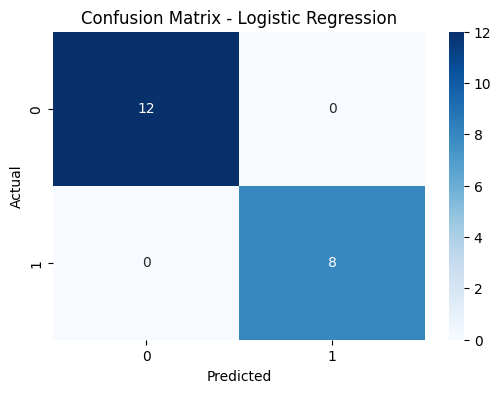

Accuracy: 1.00


In [16]:
'''
11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
classification
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
data = pd.read_csv('iris.csv')

# Drop missing values
data.dropna(inplace=True)

# Automatically convert to binary by selecting the first two unique classes
unique_classes = data['target'].unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]

# Define X and y
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")





In [17]:
'''
12.  Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
Recall, and F1-Score
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Load your dataset
# Replace 'data.csv' and 'target' with actual values
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 1.00
Recall: 1.00
F1-Score: 1.00


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



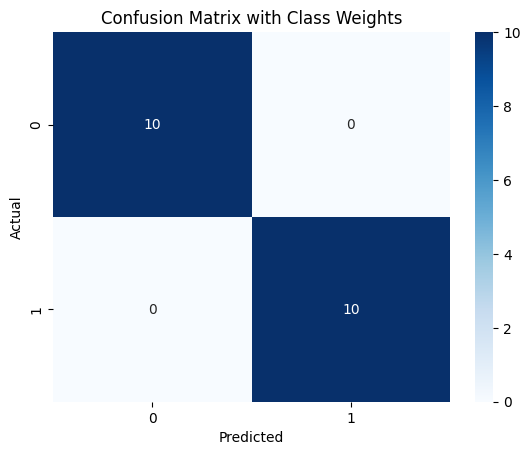

In [18]:
'''
13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
improve model performance
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
# Replace 'data.csv' and 'target' with actual values
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression with class weights
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Class Weights')
plt.show()


In [19]:
'''
14.  Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
evaluate performance
'''
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset from seaborn
raw_data = sns.load_dataset('titanic')
data = raw_data.copy()

# Drop columns with too many missing values or irrelevant for prediction
data.drop(['deck', 'embark_town', 'alive', 'class', 'who'], axis=1, inplace=True)

# Drop rows with missing target ('survived') or features like 'age' and 'embarked'
data.dropna(subset=['survived', 'age', 'embarked'], inplace=True)

# Fill missing 'embarked' with mode if any remain
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

# Encode categorical features
label_encoders = {}
for col in ['sex', 'embarked', 'alone']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features and target
X = data.drop('survived', axis=1)
y = data['survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

/tmp/ipython-input-19-522915814.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)


Accuracy: 0.7902097902097902
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82        80
           1       0.79      0.71      0.75        63

    accuracy                           0.79       143
   macro avg       0.79      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



In [20]:
'''
15.  Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
model. Evaluate its accuracy and compare results with and without scaling
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
# Replace 'data.csv' and 'target' with actual values
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression without scaling
model_no_scaling = LogisticRegression(max_iter=1000)
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# Apply Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with scaling
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Compare results
print(f"Accuracy without scaling: {accuracy_no_scaling:.2f}")
print(f"Accuracy with standardization: {accuracy_scaled:.2f}")


Accuracy without scaling: 1.00
Accuracy with standardization: 1.00


ROC-AUC Score: 1.00


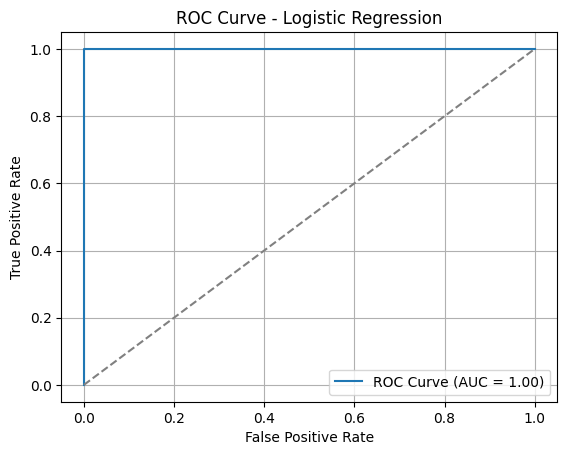

In [21]:
'''
16.  Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
# Replace 'data.csv' and 'target' with actual values
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
'''
17.  Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
accuracy
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
# Replace 'data.csv' and 'target' with actual file and column name
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression with custom learning rate (C=0.5)
model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with C=0.5: {accuracy:.2f}")


Accuracy with C=0.5: 1.00


Important Features Based on Coefficients:
petal length (cm)    2.212332
petal width (cm)     0.927443
sepal width (cm)    -0.844458
sepal length (cm)    0.462485
dtype: float64


/tmp/ipython-input-23-3683700034.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='coolwarm')


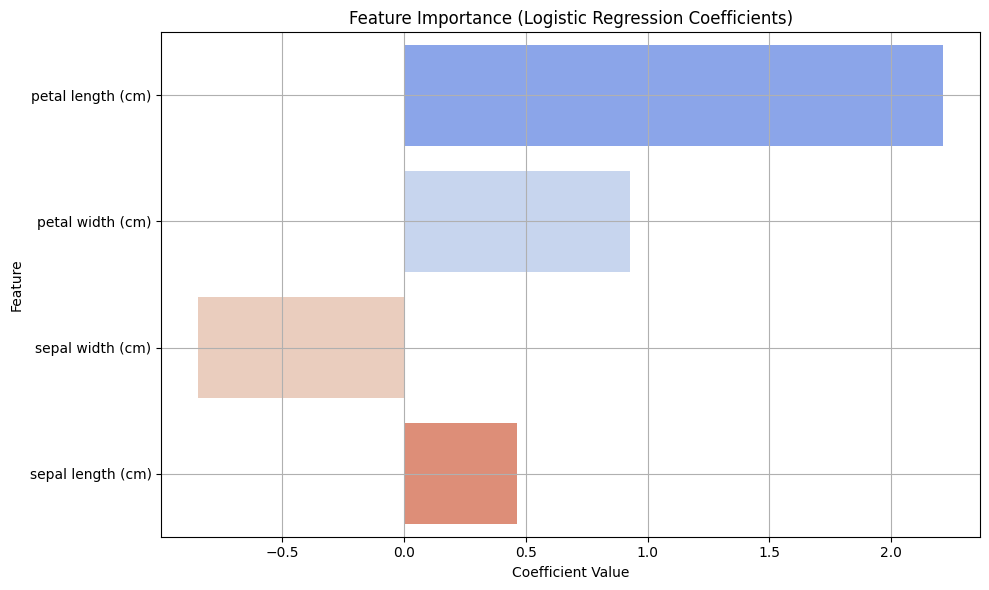

In [23]:
'''
18. Write a Python program to train Logistic Regression and identify important features based on model
coefficients
'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Replace 'data.csv' and 'target' with your actual file and target column
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Get feature importance (coefficients)
coefficients = model.coef_[0]
feature_names = X.columns
feature_importance = pd.Series(coefficients, index=feature_names).sort_values(key=abs, ascending=False)

# Display important features
print("Important Features Based on Coefficients:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette='coolwarm')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
'''
19.  Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
Score'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score

# Load dataset
# Replace 'data.csv' and 'target' with your actual file and target column
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate using Cohen's Kappa Score
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa Score: {kappa:.2f}")



Cohen's Kappa Score: 1.00


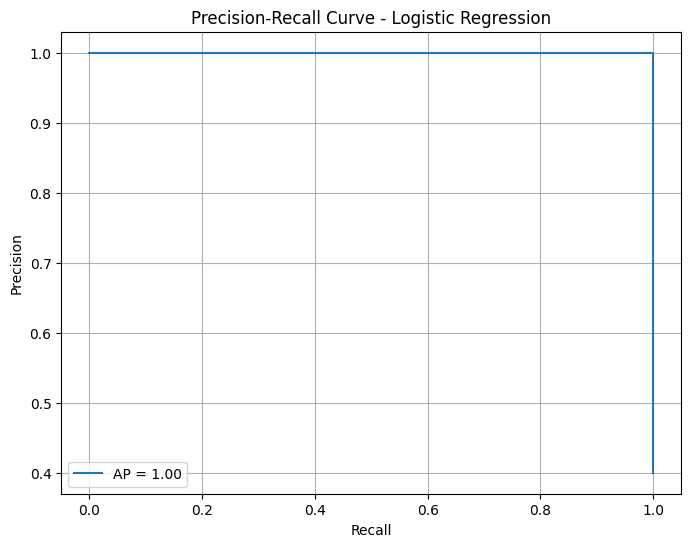

In [25]:
'''
20.  Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
classification
'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score

# Load dataset
# Replace 'data.csv' and 'target' with your actual file and target column
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]

# Compute Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
'''
21.  Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
their accuracy
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
# Replace 'data.csv' and 'target' with actual values
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']

# Dictionary to store accuracy for each solver
solver_accuracies = {}

# Train and evaluate model with each solver
for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        solver_accuracies[solver] = accuracy
        print(f"Solver: {solver}, Accuracy: {accuracy:.2f}")
    except Exception as e:
        print(f"Solver: {solver}, Error: {str(e)}")

# Summary
print("\nAccuracy Comparison by Solver:")
for solver, acc in solver_accuracies.items():
    print(f"{solver}: {acc:.2f}")


Solver: liblinear, Accuracy: 1.00
Solver: saga, Accuracy: 1.00
Solver: lbfgs, Accuracy: 1.00

Accuracy Comparison by Solver:
liblinear: 1.00
saga: 1.00
lbfgs: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [27]:
'''
22.  Write a Python program to train Logistic Regression and evaluate its performance using Matthews
Correlation Coefficient (MCC)
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
# Replace 'data.csv' and 'target' with actual values
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of solvers to compare
solvers = ['liblinear', 'saga', 'lbfgs']

# Dictionary to store accuracy for each solver
solver_accuracies = {}

# Train and evaluate model with each solver
for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=1000)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        solver_accuracies[solver] = accuracy
        print(f"Solver: {solver}, Accuracy: {accuracy:.2f}")
    except Exception as e:
        print(f"Solver: {solver}, Error: {str(e)}")

# Summary
print("\nAccuracy Comparison by Solver:")
for solver, acc in solver_accuracies.items():
    print(f"{solver}: {acc:.2f}")


Solver: liblinear, Accuracy: 1.00
Solver: saga, Accuracy: 1.00
Solver: lbfgs, Accuracy: 1.00

Accuracy Comparison by Solver:
liblinear: 1.00
saga: 1.00
lbfgs: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [28]:
'''
23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
accuracy to see the impact of feature scaling
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load dataset
# Replace 'data.csv' and 'target' with your actual file and target column
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression on raw data
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train, y_train)
y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression on standardized data
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# Print accuracy comparison
print(f"Accuracy on raw data: {accuracy_raw:.2f}")
print(f"Accuracy on standardized data: {accuracy_scaled:.2f}")


Accuracy on raw data: 1.00
Accuracy on standardized data: 1.00


In [29]:
'''
24.  Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
cross-validation
'''
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
# Replace 'data.csv' and 'target' with your actual file and target column
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Define range of C values for tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Apply GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output best parameters and evaluate on test set
best_c = grid_search.best_params_['C']
print(f"Best C value from cross-validation: {best_c}")

# Predict and calculate accuracy
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with best C: {accuracy:.2f}")


Best C value from cross-validation: 0.01
Test Accuracy with best C: 1.00


In [30]:
'''
25.  Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
make predictions.
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
# Replace 'data.csv' and 'target' with your actual file and target column
data = pd.read_csv('iris.csv')
X = data.drop('target', axis=1)
y = data['target']

# Ensure binary classification
unique_classes = y.unique()
if len(unique_classes) > 2:
    data = data[data['target'].isin(unique_classes[:2])]
    X = data.drop('target', axis=1)
    y = data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save model
joblib.dump(model, 'logistic_model.pkl')
print("Model saved as 'logistic_model.pkl'")

# Load model
loaded_model = joblib.load('logistic_model.pkl')

# Make predictions
predictions = loaded_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of loaded model: {accuracy:.2f}")


Model saved as 'logistic_model.pkl'
Accuracy of loaded model: 1.00
